# ml-olympiad-good-health-and-well-being
## Project

In [1]:
import numpy as np
np.random.seed(42)

#My imports:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, top_k_accuracy_score, roc_auc_score, silhouette_score, adjusted_rand_score,v_measure_score,f1_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt

from sklearn.model_selection import  GridSearchCV

from tensorflow import keras
import tensorflow as tf
import scipy.stats as st
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.wrappers.scikit_learn import KerasClassifier
import seaborn as sns


#Modules for sampling
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

#ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#Functions:

def metrics(ytrue, ypred, text):
    ytest = ytrue
    NNpredy = ypred
    print(f"{text}:")
    print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=NNpredY,y_true=ytest)}")
    print(f"f1 score: { f1_score(y_pred=NNpredY ,y_true=ytest,average='binary')}")
    print(f"Precy score: {precision_score(y_pred=NNpredY ,y_true=ytest,average='binary')}")
    print(f"roc_auc_score: {roc_auc_score(y_score=NNpredY ,y_true=ytest)}")
    print(f"confusion_matrix: {confusion_matrix(y_pred=NNpredY ,y_true=ytest)}")
    print(classification_report(ytest, NNpredY ))


## Data Imports:

In [2]:
testData = pd.read_csv('test.csv')
trainingData = pd.read_csv('train.csv')

## Data Exploration:

Viewing the data on the training dataframe

In [3]:
trainingData.describe()

PatientID         HighBP       HighChol      CholCheck  \
count  177576.000000  177576.000000  177576.000000  177576.000000   
mean   126899.481523       0.429230       0.423914       0.962180   
std     73166.055829       0.494968       0.494178       0.190762   
min         1.000000       0.000000       0.000000       0.000000   
25%     63655.750000       0.000000       0.000000       1.000000   
50%    126805.500000       0.000000       0.000000       1.000000   
75%    190268.500000       1.000000       1.000000       1.000000   
max    253680.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  177576.000000  177576.000000  177576.000000  177576.000000   
mean       28.380001       0.443061       0.040287       0.298244   
std         6.578401       0.496749       0.196632       0.699622   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity         Fruits  ...    NoDocbcCost        GenHlth  \
count  177576.000000  177576.000000  ...  177576.000000  177576.000000   
mean        0.756335       0.634078  ...       0.084505       2.512597   
std         0.429294       0.481689  ...       0.278144       1.069184   
min         0.000000       0.000000  ...       0.000000       1.000000   
25%         1.000000       0.000000  ...       0.000000       2.000000   
50%         1.000000       1.000000  ...       0.000000       2.000000   
75%         1.000000       1.000000  ...       0.000000       3.000000   
max         1.000000       1.000000  ...       1.000000       5.000000   

            MentHlth       PhysHlth       DiffWalk            Sex  \
count  177576.000000  177576.000000  177576.000000  177576.000000   
mean        3.195364       4.252681       0.169021       0.440690   
std         7.426860       8.736637       0.374771       0.496471   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.000000       3.000000       0.000000       1.000000   
max        30.000000      30.000000       1.000000       1.000000   

                 Age      Education         Income         target  
count  177576.000000  177576.000000  177576.000000  177576.000000  
mean        8.032808       5.048672       6.048233       0.094185  
std         3.053915       0.986419       2.072959       0.292087  
min         1.000000       1.000000       1.000000       0.000000  
25%         6.000000       4.000000       5.000000       0.000000  
50%         8.000000       5.000000       7.000000       0.000000  
75%        10.000000       6.000000       8.000000       0.000000  
max        13.000000       6.000000       8.000000       1.000000  

[8 rows x 23 columns]

In [4]:
trainingData.head()

PatientID  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Diabetes  \
0      42351       1         1          1   29       0       0         0   
1     135091       1         0          1   30       0       1         2   
2     201403       0         0          1   31       0       0         0   
3      72750       0         0          1   36       0       0         2   
4     133895       0         1          1   29       0       0         0   

   PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
0             1       1  ...            0        3         0         0   
1             0       0  ...            0        2         0         0   
2             1       1  ...            0        2         0         7   
3             0       0  ...            0        2         0         0   
4             1       1  ...            0        4         0         0   

   DiffWalk  Sex  Age  Education  Income  target  
0         0    0   13          5       8       0  
1         0    0    9          5       6       0  
2         0    0   10          6       8       0  
3         0    0   11          5       6       0  
4         1    1   10          6       7       0  

[5 rows x 23 columns]

In [5]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177576 entries, 0 to 177575
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   PatientID          177576 non-null  int64
 1   HighBP             177576 non-null  int64
 2   HighChol           177576 non-null  int64
 3   CholCheck          177576 non-null  int64
 4   BMI                177576 non-null  int64
 5   Smoker             177576 non-null  int64
 6   Stroke             177576 non-null  int64
 7   Diabetes           177576 non-null  int64
 8   PhysActivity       177576 non-null  int64
 9   Fruits             177576 non-null  int64
 10  Veggies            177576 non-null  int64
 11  HvyAlcoholConsump  177576 non-null  int64
 12  AnyHealthcare      177576 non-null  int64
 13  NoDocbcCost        177576 non-null  int64
 14  GenHlth            177576 non-null  int64
 15  MentHlth           177576 non-null  int64
 16  PhysHlth           177576 non-null  in

Splitting the target from the features and removing the patient ID

In [7]:
#Features:
x = trainingData
x = x.drop('target', axis = 'columns')
x = x.drop('PatientID', axis = 'columns')
testData = testData.drop('PatientID', axis = 'columns')
#print(trainingData.keys)
#Target
y = trainingData["target"]

Mutual information Plot

Text(0.5, 0, 'Mutual Information Index')

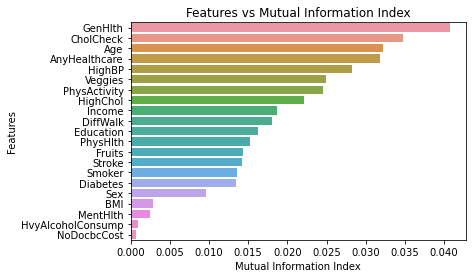

In [9]:
mi_score=mutual_info_classif(X=x,y=y)
mi_score=pd.Series(mi_score,name='MI_score', index=x.columns)
mi_score=mi_score.sort_values(ascending=False)

ax = sns.barplot(x=mi_score.values, y=mi_score.index)
ax.set_title('Features vs Mutual Information Index')
ax.set_ylabel('Features')
ax.set_xlabel('Mutual Information Index')

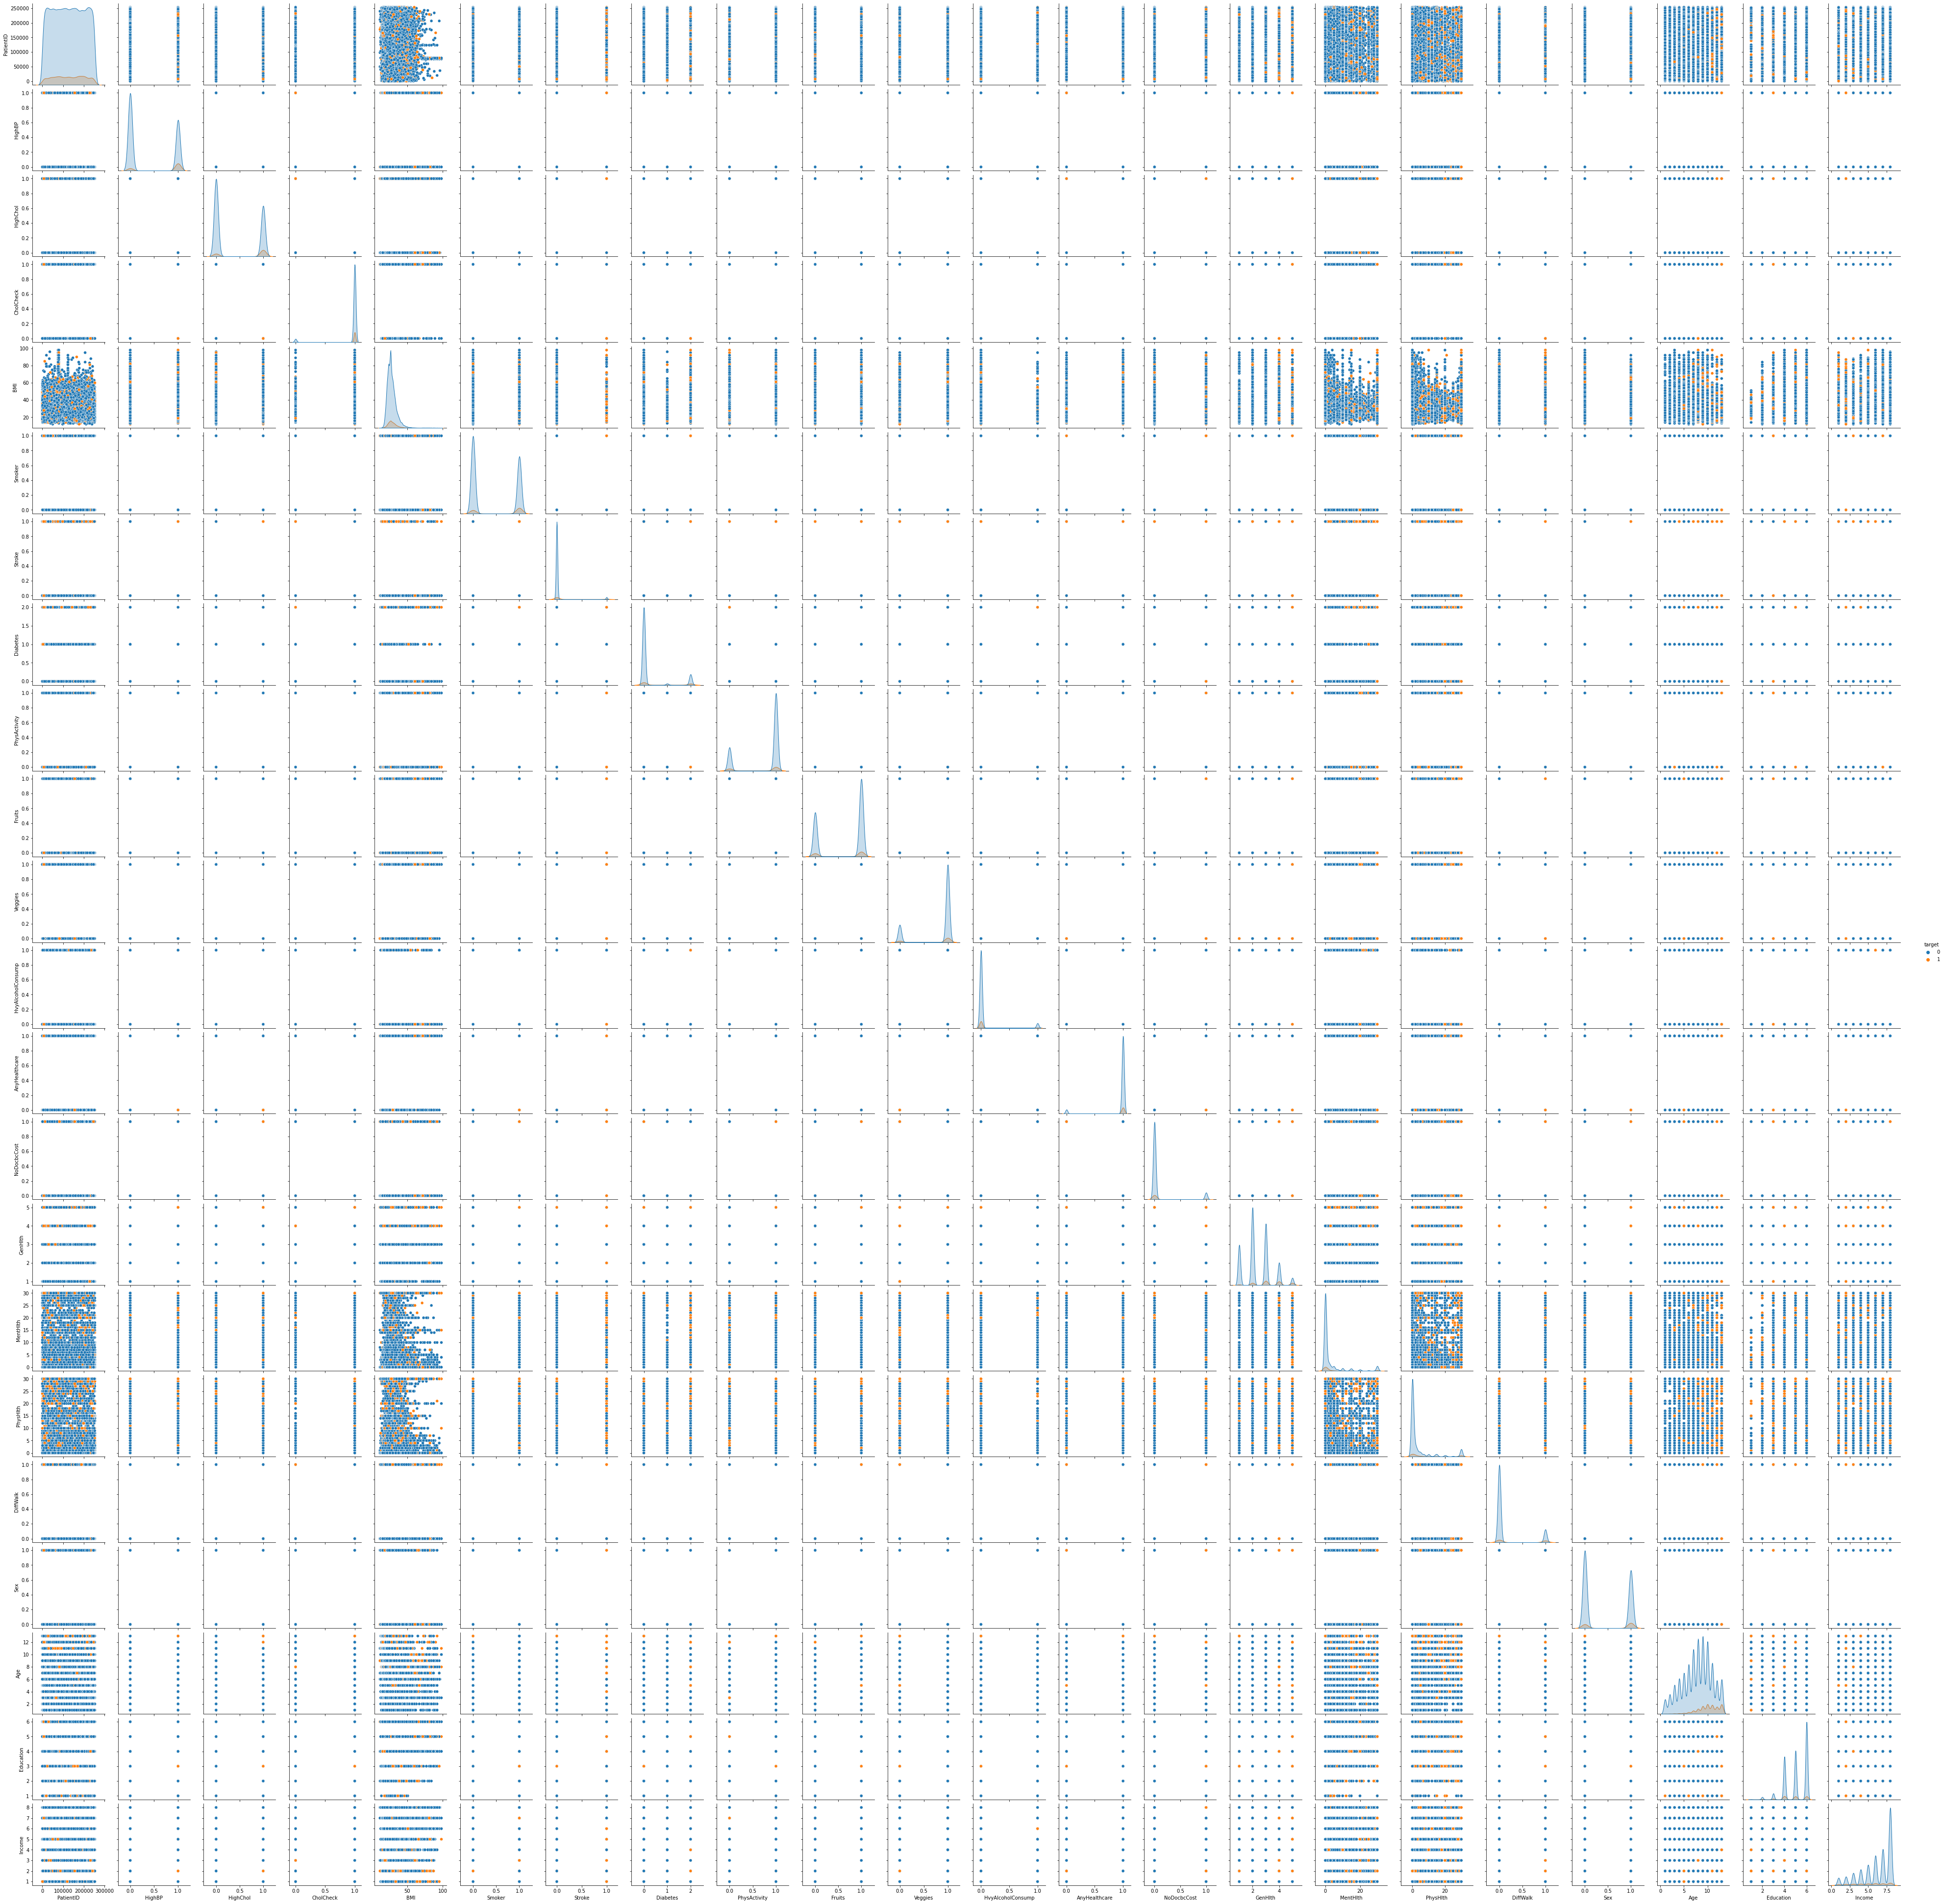

In [19]:
sns.pairplot(trainingData, hue = "target")

In [20]:
x.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

C:\Users\agber\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\agber\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


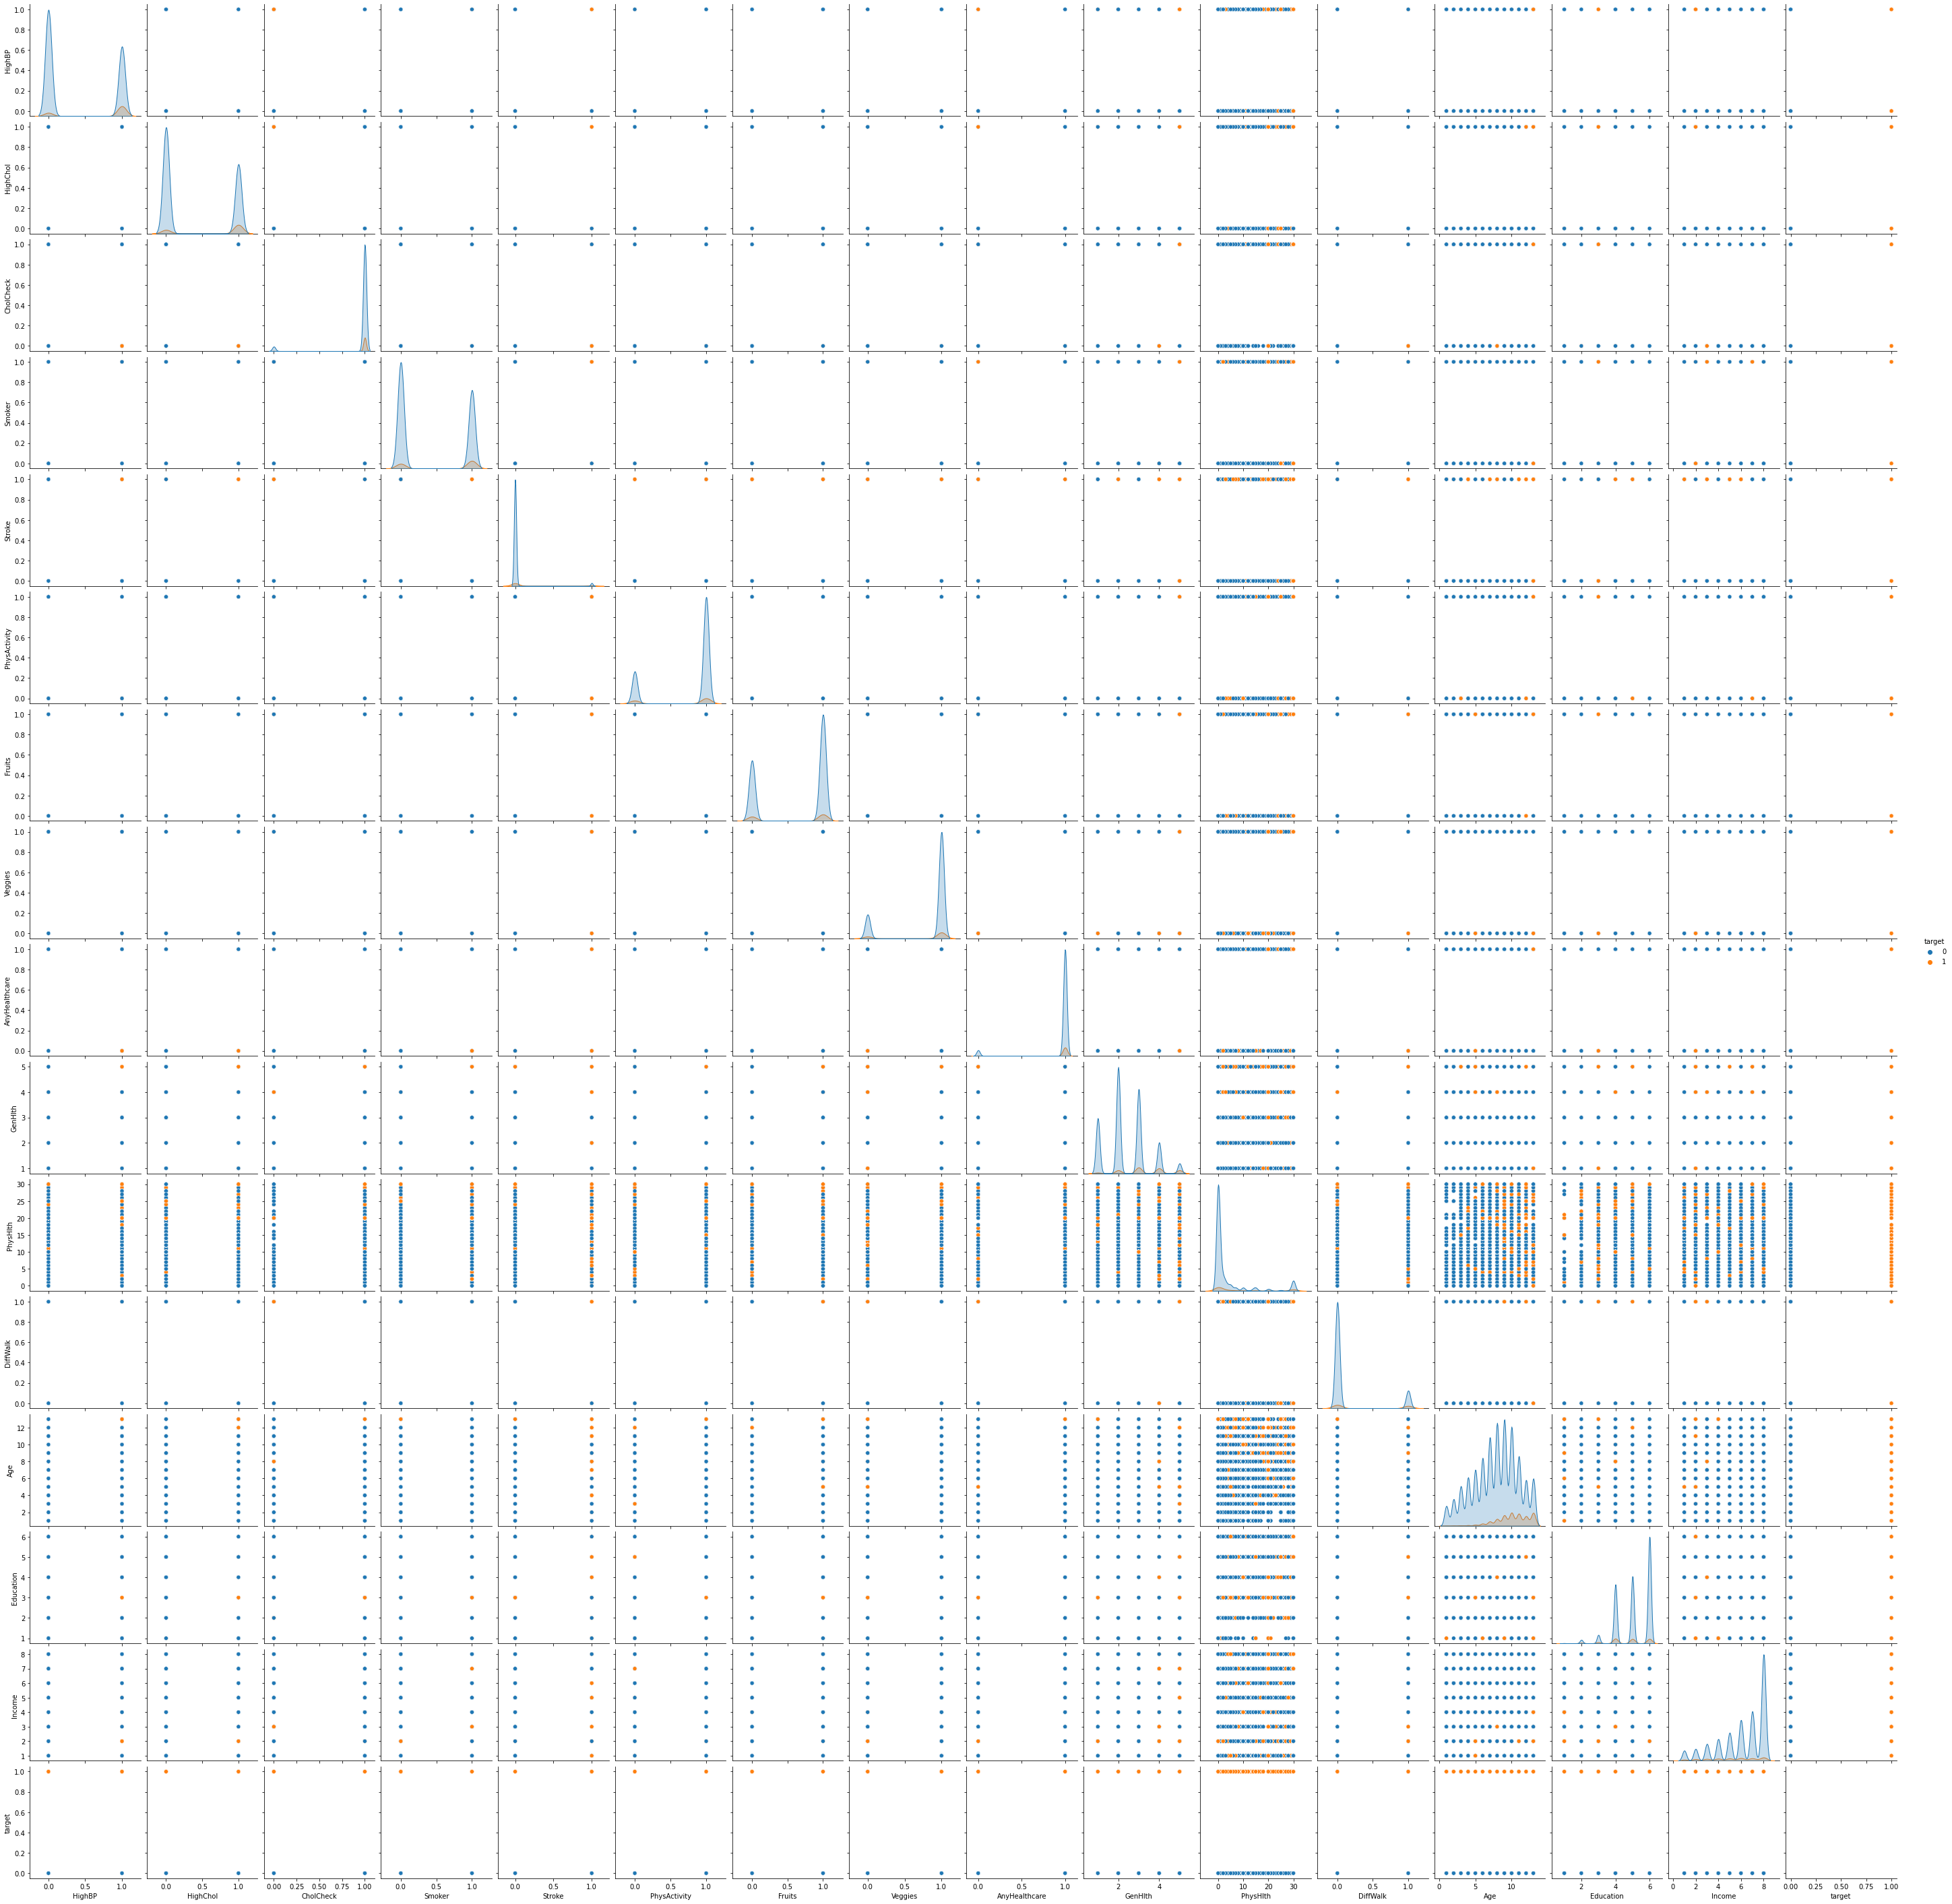

In [23]:
varrs = ['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies',
        'AnyHealthcare', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'target']
sns.pairplot(trainingData,x_vars = varrs, y_vars = varrs, hue = "target")

Performing a train test split of the training dataset with a 70% training : 30% testing split

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

Displaying of the proportions of the Target's classes on a pie chart before the train test split

ytest Count 0: 160851
ytest Count 1: 16725
Baseline Accuracy: 90.5815


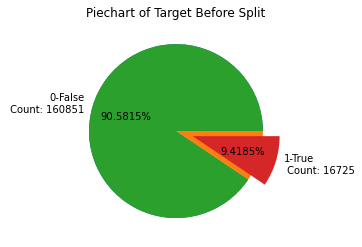

In [11]:
count_arr = np.bincount(y)
ylength = len(y)
print(f"ytest Count 0: {count_arr[0]}")
print(f"ytest Count 1: {count_arr[1]}")
print(f"Baseline Accuracy: {round(100*np.max(count_arr)/ylength,4)}")

plt.pie(count_arr)
plt.title('Piechart of Target Before Split')
labels = [f"{i}-{i==1}\n Count: {count_arr[i]}" for i in range(0,len(count_arr))]
explode = [i*0.2 for i in range(0,len(count_arr))]
plt.pie(count_arr, labels = labels, explode = explode,autopct='%1.4f%%')
plt.show()

Displaying of the proportions of the Test-split Target's classes on a pie chart

ytest Count 0: 48255
ytest Count 1: 5018
Baseline Accuracy: 90.5806


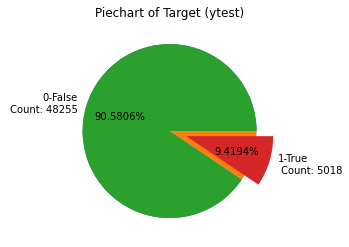

In [12]:
count_arr = np.bincount(ytest)
ylength = len(ytest)
print(f"ytest Count 0: {count_arr[0]}")
print(f"ytest Count 1: {count_arr[1]}")
print(f"Baseline Accuracy: {round(100*np.max(count_arr)/ylength,4)}")

plt.pie(count_arr)
plt.title('Piechart of Target (ytest)')
labels = [f"{i}-{i==1}\n Count: {count_arr[i]}" for i in range(0,len(count_arr))]
explode = [i*0.2 for i in range(0,len(count_arr))]
plt.pie(count_arr, labels = labels, explode = explode,autopct='%1.4f%%')
plt.show()

Displaying of the proportions of the Train-split Target's classes on a pie chart

ytrain Count 0: 112596
ytrain Count 1: 11707
Baseline Accuracy: 90.5819


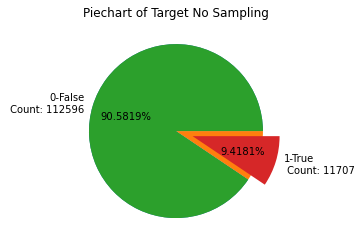

In [13]:
count_arr = np.bincount(ytrain)
ylength = len(ytrain)
print(f"ytrain Count 0: {count_arr[0]}")
print(f"ytrain Count 1: {count_arr[1]}")
print(f"Baseline Accuracy: {round(100*np.max(count_arr)/ylength,4)}")

plt.pie(count_arr)
plt.title('Piechart of Target No Sampling')
labels = [f"{i}-{i==1}\n Count: {count_arr[i]}" for i in range(0,len(count_arr))]
explode = [i*0.2 for i in range(0,len(count_arr))]
plt.pie(count_arr, labels = labels, explode = explode,autopct='%1.4f%%')
plt.show()

Under sampling of the train-split and Display of the target's proportions on a pie chart

ytest Count 0: 109437
ytest Count 1: 11707
Baseline Accuracy: 90.3363


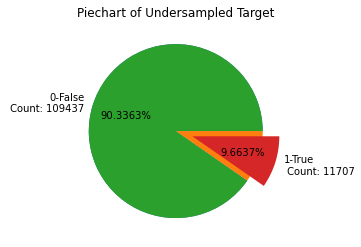

In [14]:
tl = TomekLinks(sampling_strategy = 'majority')
X_tl, y_tl= tl.fit_resample(Xtrain, ytrain)

count_arr = np.bincount(y_tl)
ylength = len(y_tl)
print(f"ytest Count 0: {count_arr[0]}")
print(f"ytest Count 1: {count_arr[1]}")
print(f"Baseline Accuracy: {round(100*np.max(count_arr)/ylength,4)}")

plt.pie(count_arr)
plt.title('Piechart of Undersampled Target')
labels = [f"{i}-{i==1}\n Count: {count_arr[i]}" for i in range(0,len(count_arr))]
explode = [i*0.2 for i in range(0,len(count_arr))]
plt.pie(count_arr, labels = labels, explode = explode,autopct='%1.4f%%')
plt.show()

Over sampling of the train-split and Display of the target's proportions on a pie chart

ytest Count 0: 112596
ytest Count 1: 112596
Baseline Accuracy: 50.0


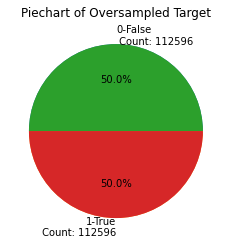

In [15]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(Xtrain, ytrain)

count_arr = np.bincount(y_sm)
ylength = len(y_sm)
print(f"ytest Count 0: {count_arr[0]}")
print(f"ytest Count 1: {count_arr[1]}")
print(f"Baseline Accuracy: {round(100*np.max(count_arr)/ylength,4)}")

plt.pie(count_arr)
plt.title('Piechart of Oversampled Target')
labels = [f"{i}-{i==1}\n Count: {count_arr[i]}" for i in range(0,len(count_arr))]
explode = [i*0.2 for i in range(0,len(count_arr))]
plt.pie(count_arr, labels = labels,autopct='%1.1f%%')
plt.show()

## Getting a Baseline Using select Machine Learning Algorithms

Getting Baseline from the Random Forest Algorithm:

In [ ]:
#Define the classifier
normal_rf = RandomForestClassifier()
undersampled_rf = RandomForestClassifier()
Oversampled_rf = RandomForestClassifier()

"n_estimators=1000, # Number of trees to train\n                       criterion='gini', # How to train the trees. Also supports entropy.\n                       max_depth=None, # Max depth of the trees. Not necessary to change.\n                       min_samples_split=2, # Minimum samples to create a split.\n                       min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.\n                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.\n                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)\n                       max_leaf_nodes=None, # Maximum number of nodes.\n                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.\n                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.\n                       oob_score=True,  # If report accuracy

In [ ]:
# Train the RF.
normal_rf.fit(Xtrain,ytrain)
undersampled_rf.fit(X_tl, y_tl)
Oversampled_rf.fit(X_sm, y_sm)

RandomForestClassifier()

In [ ]:
#sample_submission = pd.read_csv('sample_submission.csv')
#ytest = sample_submission['target']

predYnorm = normal_rf.predict(Xtest)
predYunder = undersampled_rf.predict(Xtest)
predYOver = Oversampled_rf.predict(Xtest)

In [ ]:
print(f"Random Forest:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predYnorm,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predYnorm,y_true=ytest,average='binary')}")
print(f"precision score: {precision_score(y_pred=predYnorm,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predYnorm,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predYnorm,y_true=ytest)}")
print(classification_report(ytest, predYnorm))

print(f"Under:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predYunder,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predYunder,y_true=ytest,average='binary')}")
print(f"precision score: {precision_score(y_pred=predYunder,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predYunder,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predYunder,y_true=ytest)}")
print(classification_report(ytest, predYunder))

print(f"Random Forest:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predYOver,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predYOver,y_true=ytest,average='binary')}")
print(f"precision score: {precision_score(y_pred=predYOver,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predYOver,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predYOver,y_true=ytest)}")
print(classification_report(ytest, predYOver))

Random Forest:
balanced accuracy_score: 0.5471748601728421
f1 score: 0.17424975798644726
precision score: 0.4576271186440678
roc_auc_score: 0.5471748601728421
confusion_matrix: [[47615   640]
 [ 4478   540]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     48255
           1       0.46      0.11      0.17      5018

    accuracy                           0.90     53273
   macro avg       0.69      0.55      0.56     53273
weighted avg       0.87      0.90      0.88     53273

Under:
balanced accuracy_score: 0.5568912933024575
f1 score: 0.20205742361430987
precision score: 0.44013377926421404
roc_auc_score: 0.5568912933024575
confusion_matrix: [[47418   837]
 [ 4360   658]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     48255
           1       0.44      0.13      0.20      5018

    accuracy                           0.90     53273
   macro avg       0.68      0.56      0.58   

Getting Baseline from the Logistic Regression Algorithm:

In [ ]:
reg_pipe = Pipeline([
('scale', StandardScaler()),
('log_regression', LogisticRegression()) 
])
reg_pipe.fit(Xtrain, ytrain)
predY = reg_pipe.named_steps['log_regression'].predict(Xtest)

print(f"LogisticRegression:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predY,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predY,y_true=ytest,average='binary')}")
print(f"Prec score: {precision_score(y_pred=predY,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predY,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predY,y_true=ytest)}")
print(classification_report(ytest, predY))

LogisticRegression:
balanced accuracy_score: 0.5309356898524549
f1 score: 0.1814491282757621
Prec score: 0.0998006379585327
roc_auc_score: 0.5309356898524549
confusion_matrix: [[ 3101 45154]
 [   12  5006]]
              precision    recall  f1-score   support

           0       1.00      0.06      0.12     48255
           1       0.10      1.00      0.18      5018

    accuracy                           0.15     53273
   macro avg       0.55      0.53      0.15     53273
weighted avg       0.91      0.15      0.13     53273



In [ ]:
reg_pipe1 = Pipeline([
('scale', StandardScaler()),
('log_regression', LogisticRegression()) 
])
reg_pipe1.fit(X_tl, y_tl)
predYu = reg_pipe1.named_steps['log_regression'].predict(Xtest)


print(f"Under:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predYu,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predYu,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=predYu,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predYu,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predYu,y_true=ytest)}")
print(classification_report(ytest, predYu))

Under:
balanced accuracy_score: 0.5305315866507142
f1 score: 0.18132096999112593
Precy score: 0.09972310205382577
roc_auc_score: 0.5305315866507141
confusion_matrix: [[ 3062 45193]
 [   12  5006]]
              precision    recall  f1-score   support

           0       1.00      0.06      0.12     48255
           1       0.10      1.00      0.18      5018

    accuracy                           0.15     53273
   macro avg       0.55      0.53      0.15     53273
weighted avg       0.91      0.15      0.13     53273



In [ ]:
reg_pipe2 = Pipeline([
('scale', StandardScaler()),
('log_regression', LogisticRegression()) 
])
reg_pipe2.fit(X_sm, y_sm)
predYo = reg_pipe2.named_steps['log_regression'].predict(Xtest)

print(f"Over Sampled:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predYo,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predYo,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=predYo,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predYo,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predYo,y_true=ytest)}")
print(classification_report(ytest, predYo))

LogisticRegression:
balanced accuracy_score: 0.5363045724233295
f1 score: 0.18316614190525007
Precy score: 0.10084660350735739
roc_auc_score: 0.5363045724233295
confusion_matrix: [[ 3648 44607]
 [   15  5003]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     48255
           1       0.10      1.00      0.18      5018

    accuracy                           0.16     53273
   macro avg       0.55      0.54      0.16     53273
weighted avg       0.91      0.16      0.14     53273



Getting Baseline from the XGBoost Classifier Algorithm:

In [ ]:
XGBpipe = Pipeline([
  ('standardize', StandardScaler()),
  ('xgb', XGBClassifier())
])

XGBpipe.fit(Xtrain, ytrain)
xpredY = XGBpipe.named_steps['xgb'].predict(Xtest)
print(f"XGBoost:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=xpredY,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=xpredY,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=xpredY,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=xpredY,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=xpredY,y_true=ytest)}")
print(classification_report(ytest, xpredY))

C:\Users\agber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:52] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost:
balanced accuracy_score: 0.5240178399932041
f1 score: 0.17279332863230834
Precy score: 0.1021051487372731
roc_auc_score: 0.5240178399932041
confusion_matrix: [[23474 24781]
 [ 2200  2818]]
              precision    recall  f1-score   support

           0       0.91      0.49      0.64     48255
           1       0.10      0.56      0.17      5018

    accuracy                           0.49     53273
   macro avg       0.51      0.52      0.40     53273
weighted avg       0.84      0.49      0.59     53273



In [ ]:
XGBpipe2 = Pipeline([
  ('standardize', StandardScaler()),
  ('xgb', XGBClassifier())
])

XGBpipe2.fit(X_tl, y_tl)
xpredYu = XGBpipe2.named_steps['xgb'].predict(Xtest)
print(f"Under:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=xpredYu,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=xpredYu,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=xpredYu,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=xpredYu,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=xpredYu,y_true=ytest)}")
print(classification_report(ytest, xpredYu))

C:\Users\agber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:00] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Under:
balanced accuracy_score: 0.49728579848014975
f1 score: 0.1608826701324558
Precy score: 0.09340183014930166
roc_auc_score: 0.49728579848014964
confusion_matrix: [[20019 28236]
 [ 2109  2909]]
              precision    recall  f1-score   support

           0       0.90      0.41      0.57     48255
           1       0.09      0.58      0.16      5018

    accuracy                           0.43     53273
   macro avg       0.50      0.50      0.36     53273
weighted avg       0.83      0.43      0.53     53273



In [ ]:
XGBpipe2 = Pipeline([
  ('standardize', StandardScaler()),
  ('xgb', XGBClassifier())
])

XGBpipe2.fit(X_sm, y_sm)
xpredYo = XGBpipe2.named_steps['xgb'].predict(Xtest)
print(f"Over:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=xpredYo,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=xpredYo,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=xpredYo,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=xpredYo,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=xpredYo,y_true=ytest)}")
print(classification_report(ytest, xpredYo))

C:\Users\agber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:54] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Over:
balanced accuracy_score: 0.5083489242890964
f1 score: 0.06660527931246164
Precy score: 0.14485981308411214
roc_auc_score: 0.5083489242890965
confusion_matrix: [[46974  1281]
 [ 4801   217]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     48255
           1       0.14      0.04      0.07      5018

    accuracy                           0.89     53273
   macro avg       0.53      0.51      0.50     53273
weighted avg       0.84      0.89      0.86     53273



Getting Baseline from the K Nearest Neighbors Classifier Algorithm:

In [ ]:
KNCpipe = Pipeline([
  ('standardize', StandardScaler()),
  ('KNC', KNeighborsClassifier())
])

KNCpipe.fit(Xtrain, ytrain)
kpredY = KNCpipe.named_steps['KNC'].predict(Xtest)
print(f"KNeighborsClassifier:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=kpredY,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=kpredY,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=kpredY,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=kpredY,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=kpredY,y_true=ytest)}")
print(classification_report(ytest, kpredY))

KNeighborsClassifier:
balanced accuracy_score: 0.5177381631287452
f1 score: 0.10266996972199284
Precy score: 0.1659252669039146
roc_auc_score: 0.5177381631287452
confusion_matrix: [[46380  1875]
 [ 4645   373]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     48255
           1       0.17      0.07      0.10      5018

    accuracy                           0.88     53273
   macro avg       0.54      0.52      0.52     53273
weighted avg       0.84      0.88      0.86     53273



In [ ]:
KNCpipe2 = Pipeline([
  ('standardize', StandardScaler()),
  ('KNC', KNeighborsClassifier())
])

KNCpipe2.fit(X_tl, y_tl)
kpredYu = KNCpipe2.named_steps['KNC'].predict(Xtest)
print(f"under:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=kpredYu,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=kpredYu,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=kpredYu,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=kpredYu,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=kpredYu,y_true=ytest)}")
print(classification_report(ytest, kpredYu))

under:
balanced accuracy_score: 0.5326363026995676
f1 score: 0.14849240535026073
Precy score: 0.17218717139852788
roc_auc_score: 0.5326363026995676
confusion_matrix: [[45106  3149]
 [ 4363   655]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     48255
           1       0.17      0.13      0.15      5018

    accuracy                           0.86     53273
   macro avg       0.54      0.53      0.54     53273
weighted avg       0.84      0.86      0.85     53273



In [ ]:
KNCpipe3 = Pipeline([
  ('standardize', StandardScaler()),
  ('KNC', KNeighborsClassifier())
])

KNCpipe3.fit(X_sm, y_sm)
kpredYo = KNCpipe2.named_steps['KNC'].predict(Xtest)
print(f"Over:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=kpredYu,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=kpredYo,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=kpredYo,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=kpredYo,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=kpredYo,y_true=ytest)}")
print(classification_report(ytest, kpredYo))

Over:
balanced accuracy_score: 0.5326363026995676
f1 score: 0.14849240535026073
Precy score: 0.17218717139852788
roc_auc_score: 0.5326363026995676
confusion_matrix: [[45106  3149]
 [ 4363   655]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     48255
           1       0.17      0.13      0.15      5018

    accuracy                           0.86     53273
   macro avg       0.54      0.53      0.54     53273
weighted avg       0.84      0.86      0.85     53273



Getting Baseline from the Neural Network Algorithm:

In [15]:
scaler = MinMaxScaler()
#fit scaler to the training set features
scaler.fit(Xtrain)
#scale the training set features using the transform method
X_train_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)
X_tl_scaled = scaler.transform(X_tl)
X_sm_scaled = scaler.transform(X_sm)


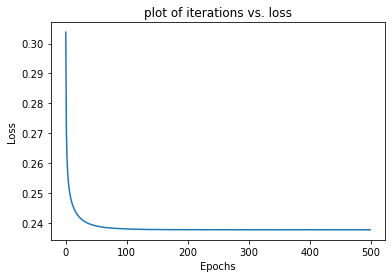

Normal:
balanced accuracy_score: 0.5538833404592705
f1 score: 0.19402495075508863
Precy score: 0.5502793296089385
roc_auc_score: 0.5538833404592705
confusion_matrix: [[47772   483]
 [ 4427   591]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     48255
           1       0.55      0.12      0.19      5018

    accuracy                           0.91     53273
   macro avg       0.73      0.55      0.57     53273
weighted avg       0.88      0.91      0.88     53273



In [54]:
input_seq = Input(shape=(X_train_scaled.shape[1],))
output_seq = Dense(1, activation='sigmoid')(input_seq)
nnModel = Model(input_seq,output_seq)
#create the model object
opt = keras.optimizers.SGD(learning_rate=0.01)
nnModel.compile( optimizer = opt,loss='binary_crossentropy', metrics=['binary_crossentropy'])

history = nnModel.fit(X_train_scaled,ytrain,epochs=500, verbose=0) #, validation_split=0.2, shuffle=True,validation_data=(X_test_scaled,ytest))

plt.figure()
plt.plot(history.history['loss'])
plt.title('plot of iterations vs. loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

NNpredY = nnModel.predict(Xtest_scaled)
NNpredY = list(map(lambda x: 0 if x<0.5 else 1, NNpredY))
metrics(ytest, NNpredY, "Normal")

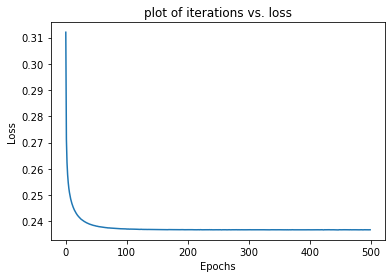

Under:
balanced accuracy_score: 0.5538833404592705
f1 score: 0.19402495075508863
Precy score: 0.5502793296089385
roc_auc_score: 0.5538833404592705
confusion_matrix: [[47772   483]
 [ 4427   591]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     48255
           1       0.55      0.12      0.19      5018

    accuracy                           0.91     53273
   macro avg       0.73      0.55      0.57     53273
weighted avg       0.88      0.91      0.88     53273



In [56]:
input_seq = Input(shape=(X_train_scaled.shape[1],))
output_seq = Dense(1, activation='sigmoid')(input_seq)
nnModel1 = Model(input_seq,output_seq)
#create the model object
opt = keras.optimizers.SGD(learning_rate=0.01)
nnModel1.compile( optimizer = opt,loss='binary_crossentropy', metrics=['binary_crossentropy'])

history1 = nnModel1.fit(X_tl_scaled,y_tl,epochs=500, verbose=0) #, validation_split=0.2, shuffle=True,validation_data=(X_test_scaled,ytest))

plt.figure()
plt.plot(history1.history['loss'])
plt.title('plot of iterations vs. loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

NNpredYu = nnModel1.predict(Xtest_scaled)
NNpredYu = list(map(lambda x: 0 if x<0.5 else 1, NNpredYu))
metrics(ytest, NNpredYu, "Under")

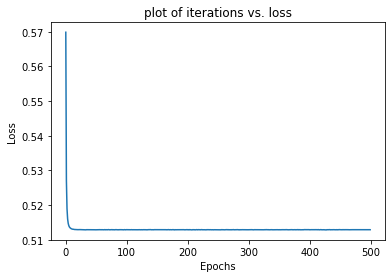

Over:
balanced accuracy_score: 0.5538833404592705
f1 score: 0.19402495075508863
Precy score: 0.5502793296089385
roc_auc_score: 0.5538833404592705
confusion_matrix: [[47772   483]
 [ 4427   591]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     48255
           1       0.55      0.12      0.19      5018

    accuracy                           0.91     53273
   macro avg       0.73      0.55      0.57     53273
weighted avg       0.88      0.91      0.88     53273



In [57]:
input_seq = Input(shape=(X_train_scaled.shape[1],))
output_seq = Dense(1, activation='sigmoid')(input_seq)
nnModel2 = Model(input_seq,output_seq)
#create the model object
opt = keras.optimizers.SGD(learning_rate=0.01)
nnModel2.compile( optimizer = opt,loss='binary_crossentropy', metrics=['binary_crossentropy'])

history2 = nnModel2.fit(X_sm_scaled,y_sm,epochs=500, verbose=0) #, validation_split=0.2, shuffle=True,validation_data=(X_test_scaled,ytest))

plt.figure()
plt.plot(history2.history['loss'])
plt.title('plot of iterations vs. loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

NNpredYo = nnModel2.predict(Xtest_scaled)
NNpredYo = list(map(lambda x: 0 if x<0.5 else 1, NNpredYo))
metrics(ytest, NNpredYo, "Over")

### Output dataframes as csv files to remove the need to re-do previous steps:

In [18]:
over = [X_sm, y_sm]
overDF = pd.concat(over, axis=1)
overDF.to_csv('oversm.csv')

In [19]:
under = [X_tl, y_tl]
underDF = pd.concat(under , axis=1)
underDF.to_csv('undersm.csv') 

In [20]:
train = [Xtrain, ytrain]
trainDF = pd.concat(train, axis=1)
trainDF.to_csv('train_Normsm.csv') 

In [21]:
testsplit = [Xtest, ytest]
testsplitDF = pd.concat(testsplit, axis=1)
testsplitDF.to_csv('testsplit.csv') 

In [ ]:
print('Classification Report:')
print(classification_report(ytest, kpredYu))

In [ ]:
print('Classification Report:')
print(classification_report(ytest, kpredYo))

## Hyperparameter Tuning

### Random Forest + Under-sampled Dataset

In [ ]:
pipeline = Pipeline([
  ('standardize', StandardScaler()),
  ('RF', RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='gini', # How to train the trees. Also supports entropy.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                       random_state=42, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced'
                                    ))
])
params = {'RF__class_weight':[{0: 0.96, 1: 0.01}, {0:0.01, 1: 0.96},{0:0.5, 1: 0.5},'balanced']}
gscv = GridSearchCV(pipeline, param_grid=params, cv=10, scoring = 'f1', refit=True)
gscv.fit(X_tl, y_tl)
print(gscv.best_estimator_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   34.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   28.7s finished
[Parallel(

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   24.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   24.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.

Pipeline(steps=[('standardize', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=0.001,
                                        n_estimators=1000, n_jobs=-1,
                                        oob_score=True, random_state=42,
                                        verbose=1))])


#### Random Forest Best Estimator Results

In [ ]:
predyf= gscv.best_estimator_.predict(Xtest)
print(f"Under:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=predyf,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=predyf,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=predyf,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=predyf,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=predyf,y_true=ytest)}")
print(classification_report(ytest, predyf))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Under:
balanced accuracy_score: 0.7688835909304887
f1 score: 0.3609628008752735
Precy score: 0.23126962763571107
roc_auc_score: 0.7688835909304887
confusion_matrix: [[34547 13708]
 [  894  4124]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     48255
           1       0.23      0.82      0.36      5018

    accuracy                           0.73     53273
   macro avg       0.60      0.77      0.59     53273
weighted avg       0.90      0.73      0.78     53273



### K-Nearest Neighbor + Under-sampled Dataset (With Results)

In [ ]:
KNCpipe3 = Pipeline([
  ('standardize', StandardScaler()),
  ('KNC', KNeighborsClassifier())
])

params = {'KNC__weights':['uniform', 'distance']}
gscvk = GridSearchCV(KNCpipe3, param_grid=params, cv=10, scoring = 'f1', refit=True)
gscvk.fit(X_tl, y_tl)
print(gscvk.best_estimator_)

KNCpipe3.fit(X_sm, y_sm)
kpredYo = gscvk.best_estimator_.predict(Xtest)
print(f"Over:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=kpredYu,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=kpredYo,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=kpredYo,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=kpredYo,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=kpredYo,y_true=ytest)}")
print(classification_report(ytest, kpredYo))

Pipeline(steps=[('standardize', StandardScaler()),
                ('KNC', KNeighborsClassifier(weights='distance'))])
Over:
balanced accuracy_score: 0.5326363026995676
f1 score: 0.23993685872138912
Precy score: 0.35294117647058826
roc_auc_score: 0.5735482281401709
confusion_matrix: [[46583  1672]
 [ 4106   912]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     48255
           1       0.35      0.18      0.24      5018

    accuracy                           0.89     53273
   macro avg       0.64      0.57      0.59     53273
weighted avg       0.87      0.89      0.88     53273



### Neural Network Hyper parameter tuning (Not Used Due to Opaque nature of NN)

In [16]:
MLPhype = Pipeline([
    ('standardize', StandardScaler()),
    ('MLP', MLPClassifier())
])

param_grid = {
    'MLP__hidden_layer_sizes': [(21,30,21), (102,90,45), (105,51,24)],
    #'MLP__max_iter': [100, 200, 50],
    'MLP__activation': ['tanh', 'relu','logistic'],
    'MLP__solver': ['sgd', 'adam'],
    'MLP__alpha': [0.001, 0.05],
    'MLP__learning_rate': ['constant','adaptive']
}


#n_jobs = -1 uses all processors
MLPgrid = GridSearchCV(MLPhype, param_grid, cv=10, verbose =2) #n_jobs= -1, 
MLPgrid.fit(X_tl,y_tl)
print(MLPgrid.best_params_) 

MLPpredH = MLPgrid.best_params_.predict(Xtest_scaled)

print(f"Hyper-Under Sampled:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=MLPpredH,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=MLPpredH,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=MLPpredH,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=MLPpredH,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=MLPpredH,y_true=ytest)}")
print(classification_report(ytest, MLPpredH))

#ref: https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  18.8s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  19.4s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  17.7s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  18.9s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  23.3s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  18.1s
[CV] END MLP__activation=

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.6min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.3min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.9min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.0min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 2.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  51.5s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  51.2s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  50.5s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  52.4s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  51.5s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), 

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.8min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.9min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.1min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  40.3s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  38.0s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  49.7s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  32.5s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  50.4s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90,

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 2.0min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.7min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.8min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.7min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.7min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.1min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  36.0s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  31.1s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  35.4s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  24.8s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  32.8s
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.0min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.4min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.6min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.4min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.3min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.3min
[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=tanh, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.0min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  21.9s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  29.5s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  26.3s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  21.7s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  19.6s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__

[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.1min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.1min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  52.0s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.0min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.3min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 

[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.6min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.9min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.8min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  52.5s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.2min
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  47.9s
[CV] END MLP__activation=tanh, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24)

[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  51.5s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time= 1.0min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  51.6s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time= 1.0min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90,

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 6.6min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 6.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.8min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.6min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.7min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.8min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 2.0min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.8min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.8min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 2.0min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.8min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.6min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 6.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.8min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.7min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.3min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  38.9s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  38.6s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  40.1s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  40.1s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  42.4s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.7min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=367.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.1min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.5min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.4min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.4min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.4min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.4min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.7min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.9min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.9min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.1min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.4min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  22.1s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  26.7s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  25.0s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  22.7s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  25.1s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__

[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.6min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 6.6min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 6.3min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 8.6min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=11.4min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 5.4min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 

[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.6min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.8min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.7min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.8min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.4min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 4.4min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24)

[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  12.5s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  12.3s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  12.4s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  13.4s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  13.7s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  12.3s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.5min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  40.9s


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.6min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.5min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  36.9s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.3min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  33.0s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  57.3s


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.6min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  56.2s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.5min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  33.6s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.5min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.5min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  56.6s


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.5min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.3min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.0min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  13.8s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  13.3s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=sgd; total time=  14.7s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, ML

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 4.2min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=  32.4s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=  32.9s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.0min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=  45.9s


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.6min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=  39.4s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=  51.5s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=constant, MLP__solver=adam; total time=  47.9s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, M

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.4min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.4min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  37.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  24.8s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  59.4s


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.9min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.8min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 2.8min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=adam; total time=  45.6s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_

[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  50.2s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  38.0s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  39.6s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  26.3s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  37.0s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(102, 90, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=  26.8s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__h

[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.1min
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.2min
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.0min
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  54.4s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  53.3s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(105, 51, 24), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  51.9s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_

AttributeError: 'dict' object has no attribute 'predict'

In [20]:
print(MLPgrid.best_params_['MLP__activation'])
#{'MLP__activation': 'relu', 'MLP__alpha': 0.05, 'MLP__hidden_layer_sizes': (21, 30, 21), 'MLP__learning_rate': 'constant', 'MLP__solver': 'sgd'}

relu


In [17]:
MLPhype = Pipeline([
    ('standardize', StandardScaler()),
    ('MLP', MLPClassifier())
])

param_grid = {
    'MLP__hidden_layer_sizes': [(21,30,21), (42,180,45)],
    'MLP__activation': ['relu','logistic'],
    'MLP__solver': ['sgd', 'adam'],
    'MLP__alpha': [0.001, 0.05],
    'MLP__learning_rate': ['constant','adaptive']
}


#n_jobs = -1 uses all processors
MLPgrid = GridSearchCV(MLPhype, param_grid, cv=2, verbose =2,scoring = 'f1', refit=True) #n_jobs= -1, 
MLPgrid.fit(X_tl,y_tl)
print(MLPgrid.best_params_)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  24.3s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  27.2s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.3min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.6min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  45.6s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  52.6s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.4min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 1.2min
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=constant, MLP__solver=sgd; total time=  57.1s
[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 4

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 5.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.9min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  28.8s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=  24.0s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time=  39.3s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time=  32.8s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  56.8s
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=constant, MLP__solver=adam; total time=10.7min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 8.7min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 2.5min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.9min
[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 8.9min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=relu, MLP__alpha=0.05, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time=12.0min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.2min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time=  27.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  29.6s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_

C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 3.4min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=constant, MLP__solver=adam; total time= 1.3min
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  59.5s
[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=sgd; total time= 1.0min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.2min


C:\Users\agber\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END MLP__activation=logistic, MLP__alpha=0.001, MLP__hidden_layer_sizes=(42, 180, 45), MLP__learning_rate=adaptive, MLP__solver=adam; total time= 3.2min
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.2s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=sgd; total time=   6.1s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time=  19.8s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=constant, MLP__solver=adam; total time=  18.2s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_layer_sizes=(21, 30, 21), MLP__learning_rate=adaptive, MLP__solver=sgd; total time=  28.3s
[CV] END MLP__activation=logistic, MLP__alpha=0.05, MLP__hidden_l

In [18]:


MLP = Pipeline([
  ('standardize', StandardScaler()),
  ('MLP', MLPClassifier(
      activation =MLPgrid.best_params_['MLP__activation'],
      alpha = MLPgrid.best_params_['MLP__alpha'],
      hidden_layer_sizes = MLPgrid.best_params_['MLP__hidden_layer_sizes'],
      learning_rate = MLPgrid.best_params_['MLP__learning_rate'],
      solver = MLPgrid.best_params_['MLP__solver']
  ))
])

MLP.fit(X_tl,y_tl)
MLPpred = MLP.named_steps['MLP'].predict(Xtest_scaled)
print(f"Norm:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=MLPpred,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=MLPpred,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=MLPpred,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=MLPpred,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=MLPpred,y_true=ytest)}")
print(classification_report(ytest, MLPpred))

Norm:
balanced accuracy_score: 0.5065198277600493
f1 score: 0.028929604628736744
Precy score: 0.4491017964071856
roc_auc_score: 0.5065198277600493
confusion_matrix: [[48163    92]
 [ 4943    75]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     48255
           1       0.45      0.01      0.03      5018

    accuracy                           0.91     53273
   macro avg       0.68      0.51      0.49     53273
weighted avg       0.86      0.91      0.86     53273



In [16]:
MLP = Pipeline([
  ('standardize', StandardScaler()),
  ('MLP', MLPClassifier(
      activation ='relu',
      alpha = 0.05,
      hidden_layer_sizes = (21, 30, 21),
      learning_rate = 'constant',
      solver = 'sgd'
  ))
])

MLP.fit(X_tl,y_tl)
MLPpred = MLP.named_steps['MLP'].predict(Xtest_scaled)
print(f"Norm:")
print(f"balanced accuracy_score: { balanced_accuracy_score(y_pred=MLPpred,y_true=ytest)}")
print(f"f1 score: { f1_score(y_pred=MLPpred,y_true=ytest,average='binary')}")
print(f"Precy score: {precision_score(y_pred=MLPpred,y_true=ytest,average='binary')}")
print(f"roc_auc_score: {roc_auc_score(y_score=MLPpred,y_true=ytest)}")
print(f"confusion_matrix: {confusion_matrix(y_pred=MLPpred,y_true=ytest)}")
print(classification_report(ytest, MLPpred))

Norm:
balanced accuracy_score: 0.5
f1 score: 0.0
Precy score: 0.0
roc_auc_score: 0.5
confusion_matrix: [[48255     0]
 [ 5018     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     48255
           1       0.00      0.00      0.00      5018

    accuracy                           0.91     53273
   macro avg       0.45      0.50      0.48     53273
weighted avg       0.82      0.91      0.86     53273



C:\Users\agber\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agber\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agber\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agber\anaconda3\lib\site-packages\sklearn\metrics\_classification.p